In [2]:
df<-read.csv('d:/data/car/v100k.csv')
head(df)

wheels,chassis,pax,vtype,class
1,1,1,Bike,1
1,1,1,Bike,1
1,1,1,Bike,1
1,1,1,Bike,1
1,1,1,Bike,1
1,1,1,Bike,1


In [3]:
library(dplyr)
df<-df %>% select(-vtype) #분석에 사용하지 않을 필드 제외
dim(df)
summary(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 100000      4

     wheels          chassis           pax             class      
 Min.   : 1.000   Min.   : 1.00   Min.   : 1.000   Min.   :1.000  
 1st Qu.: 4.000   1st Qu.: 1.00   1st Qu.: 1.000   1st Qu.:2.000  
 Median : 5.000   Median :12.00   Median : 2.000   Median :3.000  
 Mean   : 7.511   Mean   :11.39   Mean   : 7.391   Mean   :2.503  
 3rd Qu.:18.000   3rd Qu.:21.00   3rd Qu.: 4.000   3rd Qu.:4.000  
 Max.   :18.000   Max.   :29.00   Max.   :39.000   Max.   :4.000  

In [4]:
(corrmatrix<-cor(df)) #상관계수 행렬

,wheels,chassis,pax,class
wheels,1.00000000,0.8572987,-0.08466927,0.9202212
chassis,0.85729867,1.0000000,0.30932832,0.9354329
pax,-0.08466927,0.3093283,1.00000000,0.2413967
class,0.92022124,0.9354329,0.24139671,1.0000000


Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded


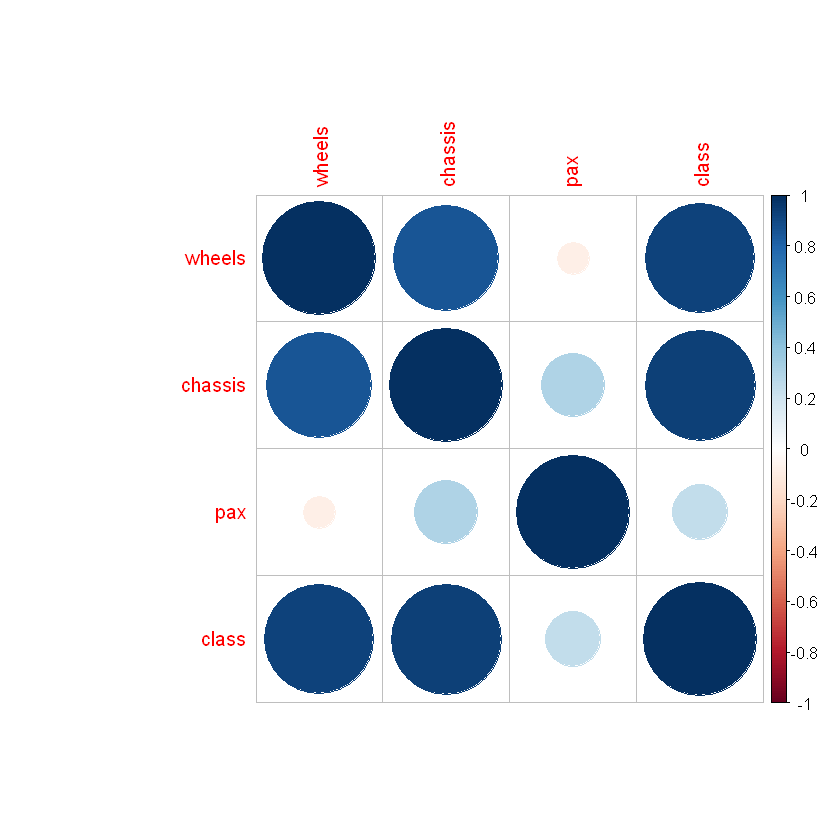

In [5]:
library(corrplot)
corrplot(corrmatrix,method='circle')


    1     2     3     4 
24894 25029 24975 25102 

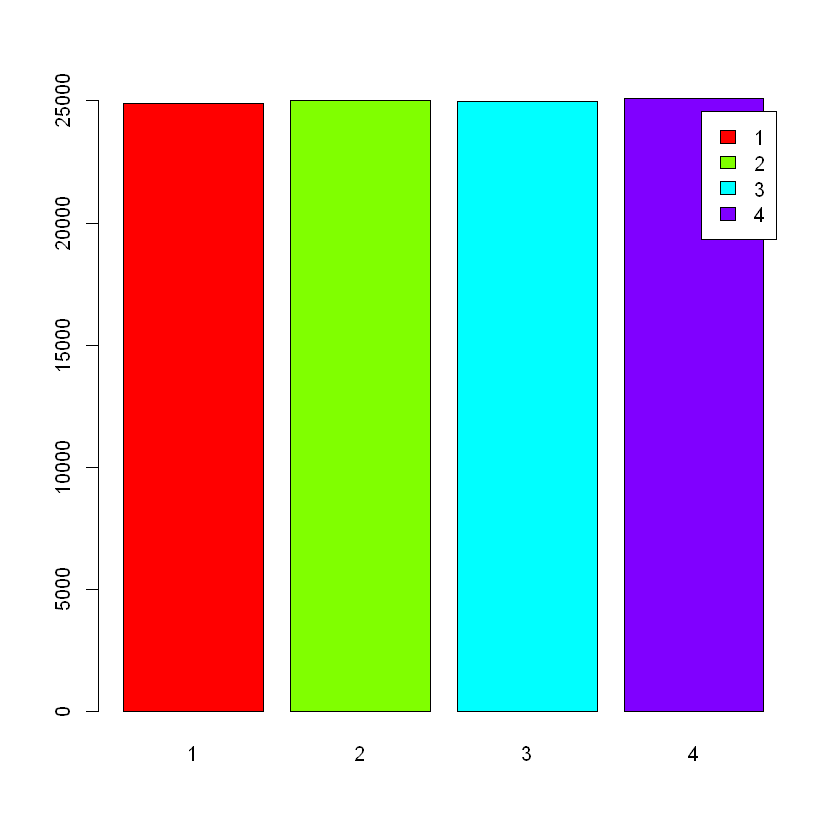

In [6]:
(tbl<-table(df$class))
barplot(tbl,beside=T,legend=T,col=rainbow(4)) #카운트 플롯

In [7]:
library(caret)
set.seed(123)
# class 필드를 기준으로 학습용:검증용=8:2로 구분
idx_train<-createDataPartition(y=df$class,p=0.8,list=F)
train<-df[idx_train,] #학습용 데이터셋
X_train<-train[,4] #독립변수
y_train<-train[,4] #종속변수
test<-df[-idx_train,] #검증용 데이터셋
X_test<-test[,-4]
y_test<-test[,4]

Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [8]:
library(nnet)
#로지스틱 회귀분석 모형
model<-multinom(class ~. , data=train)
summary(model)

# weights:  20 (12 variable)
initial  value 110904.935184 
iter  10 value 20776.199610
iter  20 value 2479.446009
iter  30 value 53.125014
iter  40 value 1.336965
iter  50 value 0.013563
iter  60 value 0.002487
iter  70 value 0.000142
iter  70 value 0.000089
iter  70 value 0.000088
final  value 0.000088 
converged


Call:
multinom(formula = class ~ ., data = train)

Coefficients:
  (Intercept)   wheels    chassis        pax
2   -39.52327 27.12506 -10.566928  0.4231048
3   -62.05704 15.00332   1.177731  2.2494341
4   -56.26192 15.77647   2.235226 -5.1597572

Std. Errors:
  (Intercept)   wheels  chassis      pax
2    14769.62 19674.30 19673.18 19337.62
3    22268.54 14451.13 10805.27 19340.56
4    21661.95 14208.88 10832.27 19498.72

Residual Deviance: 0.0001766467 
AIC: 24.00018 

In [9]:
(coef1<-coef(model)) #회귀계수 행렬

,(Intercept),wheels,chassis,pax
2,-39.52327,27.12506,-10.566928,0.4231048
3,-62.05704,15.00332,1.177731,2.2494341
4,-56.26192,15.77647,2.235226,-5.1597572


In [10]:
#검증용 데이터셋을 모형에 입력하여 예측값 계산
pred<-predict(model,newdata=X_test,type='probs')
result<-ifelse(pred>0.5,1,0)
head(pred) #예측값(실수형)
tail(result) #예측값(정수형)
head(y_test)

,1,2,3,4
1,1,1.62226e-10,1.130388e-19,1.40373e-19
9,1,1.62226e-10,1.130388e-19,1.40373e-19
13,1,1.62226e-10,1.130388e-19,1.40373e-19
15,1,1.62226e-10,1.130388e-19,1.40373e-19
20,1,1.62226e-10,1.130388e-19,1.40373e-19
23,1,1.62226e-10,1.130388e-19,1.40373e-19


,1,2,3,4
99945,0,0,0,1
99946,0,0,0,1
99950,0,0,0,1
99958,0,0,0,1
99968,0,0,0,1
99979,0,0,0,1


[1] 1 1 1 1 1 1

In [11]:
new_result=c()
for(i in 1:nrow(result)){
    for(j in 1:ncol(result)){
        if(result[i,j]==1){
            new_result[i]=j
        }
    }
}
head(new_result)

[1] 1 1 1 1 1 1

In [12]:
mean(y_test==new_result)

[1] 1

In [13]:
table(y_test,new_result)

      new_result
y_test    1    2    3    4
     1 4969    0    0    0
     2    0 5015    0    0
     3    0    0 4995    0
     4    0    0    0 5020